In [1]:
pip install wheel


Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade numpy

     |████████████████████████████████| 20.1 MB 3.0 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.25.0 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.25.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install --upgrade pandas

     |████████████████████████████████| 11.8 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 75.7 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pandasai

     |████████████████████████████████| 798 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.4 MB 112.5 MB/s eta 0:00:01
     |████████████████████████████████| 12.0 MB 88.2 MB/s eta 0:00:01
     |████████████████████████████████| 385 kB 58.2 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 97.3 MB/s eta 0:00:01
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 3.0.20
    Uninstalling prompt-toolkit-3.0.20:
      Successfully uninstalled prompt-toolkit-3.0.20
  Attempting uninstall: python-dotenv
    Found existing installation: python-dotenv 0.20.0
    Uninstalling python-dotenv-0.20.0:
      Successfully uninstalled python-dotenv-0.20.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Succes

In [1]:
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI

In [2]:
df = pd.read_csv('Netflix Userbase.csv')

In [3]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [4]:
OPENAI_API_KEY = ""

In [5]:
llm = OpenAI(api_token=OPENAI_API_KEY)

pandas_ai = PandasAI(llm)

In [6]:
pandas_ai.run(df, prompt="How many Device exist for that dataframe?")


4

In [7]:
pandas_ai.run(df, prompt="How many columns/rows exist?")


'Number of columns: 10\nNumber of rows: 70'

In [8]:
pandas_ai.run(df, prompt="How many different Country exist here?")


10

In [9]:
pandas_ai.run(df, prompt="Please list all the different 'Country' without duplicates and how many users to each country.")


United States     7
Canada            7
United Kingdom    7
Australia         7
Germany           7
France            7
Brazil            7
Mexico            7
Spain             7
Italy             7
Name: Country, dtype: int64

In [10]:
pandas_ai.run(df, prompt="How many 'User ID' are in Country Brazil?")


7

In [11]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
65,66,Premium,15,2022-01-30,2023-06-27,France,29,Male,Smartphone,1 Month
66,67,Basic,10,2022-09-18,2023-06-25,Brazil,47,Female,Smart TV,1 Month
67,68,Standard,12,2021-11-09,2023-06-24,Mexico,33,Male,Tablet,1 Month
68,69,Premium,15,2022-12-23,2023-06-23,Spain,36,Female,Laptop,1 Month


In [12]:
df['Country'].value_counts()

United States     7
Canada            7
United Kingdom    7
Australia         7
Germany           7
France            7
Brazil            7
Mexico            7
Spain             7
Italy             7
Name: Country, dtype: int64

In [14]:
pandas_ai.run(df, prompt='What is the average Monthly Revenue for each Country?')


Country
Australia         11.714286
Brazil            10.285714
Canada            11.428571
France            15.000000
Germany           10.285714
Italy             10.714286
Mexico            11.714286
Spain             14.571429
United Kingdom    12.000000
United States     13.571429
Name: Monthly Revenue, dtype: float64

In [15]:
pandas_ai.run(df, prompt='Does my dataframe have missing values?')

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

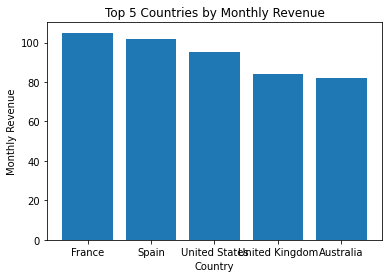

In [18]:
pandas_ai.run(df, prompt='Plot the barplot of 5 Country that have the maximum Monthly Revenue?')


In [26]:
pandas_ai.run(df, prompt='Make a table with the mean Age of each Country, separated by Gender?')


,Country,Gender,Age
0,Australia,Female,51.000000
1,Australia,Male,29.000000
2,Brazil,Female,42.333333
3,Brazil,Male,46.000000
4,Canada,Female,35.000000
5,Canada,Male,38.333333
6,France,Female,29.000000
7,France,Male,33.166667
8,Germany,Female,39.833333
9,Germany,Male,33.000000


In [27]:
pandas_ai.run(df, prompt="Please list all the different 'Country' with Premium 'Subscription Type?")


array(['Canada', 'France', 'Italy', 'Spain', 'United States'],
      dtype=object)

In [29]:
pandas_ai.run(df, prompt="Please count the values of 'Subscription Type' where the value is 'Premium' by Country?")


France           7
Spain            6
United States    5
Canada           2
Italy            1
Name: Country, dtype: int64

In [30]:
pandas_ai.run(df, prompt="Please count the values of 'Subscription Type' where the value is 'Basic' by Country?")


Germany          6
Brazil           6
Italy            6
Canada           5
United States    2
Mexico           1
Australia        1
Name: Country, dtype: int64

In [31]:
pandas_ai.run(df, prompt="Please count the values of 'Subscription Type' where the value is 'Standard' by Country?")


United Kingdom    7
Australia         6
Mexico            6
Brazil            1
Spain             1
Germany           1
Name: Country, dtype: int64